# Perfroming classification by various means

Classification is perfored by diffrent models to determine the best one

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# set plot style
sns.set_theme(style='darkgrid',palette='pastel')

### DATA VISUALIZATION

In [3]:
data = pd.read_csv('data/corona_tested_individuals.csv')

D:\Users\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1,2,3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   test_date            278848 non-null  object
 1   cough                278848 non-null  object
 2   fever                278848 non-null  object
 3   sore_throat          278848 non-null  object
 4   shortness_of_breath  278848 non-null  object
 5   head_ache            278848 non-null  object
 6   corona_result        278848 non-null  object
 7   age_60_and_above     278848 non-null  object
 8   gender               278848 non-null  object
 9   test_indication      278848 non-null  object
dtypes: object(10)
memory usage: 21.3+ MB


In [5]:
data.head(5)

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-04-30,0,0,0,0,0,negative,None,female,Other
1,2020-04-30,1,0,0,0,0,negative,None,female,Other
2,2020-04-30,0,1,0,0,0,negative,None,male,Other
3,2020-04-30,1,0,0,0,0,negative,None,female,Other
4,2020-04-30,1,0,0,0,0,negative,None,male,Other


##  DATAWRANGLING & FEATURE SELECTION

In [6]:
data.corona_result.unique()

array(['negative', 'positive', 'other'], dtype=object)

In [7]:
# drop the ones with other in corona result
data= data.loc[(data[['corona_result']] != 'other').all(axis=1)]

In [8]:
data.info()
#278848  initial entiries

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274956 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   test_date            274956 non-null  object
 1   cough                274956 non-null  object
 2   fever                274956 non-null  object
 3   sore_throat          274956 non-null  object
 4   shortness_of_breath  274956 non-null  object
 5   head_ache            274956 non-null  object
 6   corona_result        274956 non-null  object
 7   age_60_and_above     274956 non-null  object
 8   gender               274956 non-null  object
 9   test_indication      274956 non-null  object
dtypes: object(10)
memory usage: 23.1+ MB


In [9]:
data.drop(['test_date'],axis = 1,inplace = True)

In [10]:
test_indication = pd.get_dummies(data['test_indication'])
test_indication.head(1)

,Abroad,Contact with confirmed,Other
0,0,0,1


In [11]:
data = pd.concat([data,test_indication.iloc[:,:-1]],axis=1)
data.drop(['test_indication'],axis = 1,inplace = True)
data.head(1)

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,Abroad,Contact with confirmed
0,0,0,0,0,0,negative,None,female,0,0


In [12]:
gender = pd.get_dummies(data['gender'])
gender.head(1)

,None,female,male
0,0,1,0


In [13]:
data = pd.concat([data,gender.iloc[:,2]],axis=1)
data.drop(['gender'],axis = 1,inplace = True)
data.rename(columns ={'male':'Sex'},inplace = True)
data.head(1)

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,Abroad,Contact with confirmed,Sex
0,0,0,0,0,0,negative,None,0,0,0


In [14]:
age_60_and_above = pd.get_dummies(data['age_60_and_above'])
age_60_and_above.head(1)

,No,None,Yes
0,0,1,0


In [15]:
data = pd.concat([data,age_60_and_above.iloc[:,2]],axis=1)
data.drop(['age_60_and_above'],axis = 1,inplace = True)
data.rename(columns ={'Yes':'abv60'},inplace = True)
data.head(1)

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,Abroad,Contact with confirmed,Sex,abv60
0,0,0,0,0,0,negative,0,0,0,0


In [16]:
head_ache = pd.get_dummies(data['head_ache'])
head_ache.head(1)

,0,1,0,1,None
0,1,0,0,0,0


In [17]:
sum = head_ache.iloc[:,1]+head_ache.iloc[:,3]

In [18]:
data["head"]= sum
data.drop(['head_ache'],axis = 1,inplace = True)
data.head(1)

,cough,fever,sore_throat,shortness_of_breath,corona_result,Abroad,Contact with confirmed,Sex,abv60,head
0,0,0,0,0,negative,0,0,0,0,0


In [19]:
shortness_of_breath = pd.get_dummies(data['shortness_of_breath'])
shortness_of_breath.head(1)

,0,1,0,1,None
0,1,0,0,0,0


In [20]:
sum = shortness_of_breath.iloc[:,1]+shortness_of_breath.iloc[:,3]
data["shortness_breath"]= sum
data.drop(['shortness_of_breath'],axis = 1,inplace = True)
data.head(1)

,cough,fever,sore_throat,corona_result,Abroad,Contact with confirmed,Sex,abv60,head,shortness_breath
0,0,0,0,negative,0,0,0,0,0,0


In [21]:
sore_throat = pd.get_dummies(data['sore_throat'])
sore_throat.head(1)

,0,1,0,1,None
0,1,0,0,0,0


In [22]:
sum = sore_throat.iloc[:,1]+sore_throat.iloc[:,3]
data["soreThroat"]= sum
data.drop(['sore_throat'],axis = 1,inplace = True)
data.head(1)

,cough,fever,corona_result,Abroad,Contact with confirmed,Sex,abv60,head,shortness_breath,soreThroat
0,0,0,negative,0,0,0,0,0,0,0


In [23]:
fever = pd.get_dummies(data['fever'])
fever.head(1)

,0,1,0,1,None
0,1,0,0,0,0


In [24]:
sum = fever.iloc[:,1]+fever.iloc[:,3]
data["Fever"]= sum
data.drop(['fever'],axis = 1,inplace = True)
data.head(1)

,cough,corona_result,Abroad,Contact with confirmed,Sex,abv60,head,shortness_breath,soreThroat,Fever
0,0,negative,0,0,0,0,0,0,0,0


In [25]:
cough = pd.get_dummies(data['cough'])
cough.head(1)

,0,1,0,1,None
0,1,0,0,0,0


In [26]:
sum = cough.iloc[:,1]+cough.iloc[:,3]
data["Cough"]= sum
data.drop(['cough'],axis = 1,inplace = True)
data.head(1)

,corona_result,Abroad,Contact with confirmed,Sex,abv60,head,shortness_breath,soreThroat,Fever,Cough
0,negative,0,0,0,0,0,0,0,0,0


In [27]:
corona_result = pd.get_dummies(data['corona_result'])
corona_result.head(1)

,negative,positive
0,1,0


In [28]:
data = pd.concat([data,corona_result.iloc[:,1]],axis=1)
data.drop(['corona_result'],axis = 1,inplace = True)
data.head(1)


,Abroad,Contact with confirmed,Sex,abv60,head,shortness_breath,soreThroat,Fever,Cough,positive
0,0,0,0,0,0,0,0,0,0,0


In [29]:
data.to_csv('data/data.csv')

## TRAINING & TESTING

In [30]:
from sklearn.model_selection import train_test_split
from sklearn import metrics 

In [31]:
x = data.iloc[:,0:-1].values
y = data.iloc[:,-1].values

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

### Logistic regression

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
log_model = LogisticRegression()
log_model.fit(x_train, y_train.ravel())

LogisticRegression()

In [35]:
y_pred_log = log_model.predict(x_test)

## Random forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
forest = RandomForestClassifier(n_estimators = 100) 
forest.fit(x_train, y_train)

RandomForestClassifier()

In [38]:
y_pred_forest = forest.predict(x_test)
y_pred_forest

array([0, 0, 0, ..., 1, 0, 0], dtype=uint8)

## PERFORMANCE STUDY

In [39]:
log_cm = metrics.confusion_matrix(y_test,y_pred_log)
forest_cm = metrics.confusion_matrix(y_test,y_pred_forest)

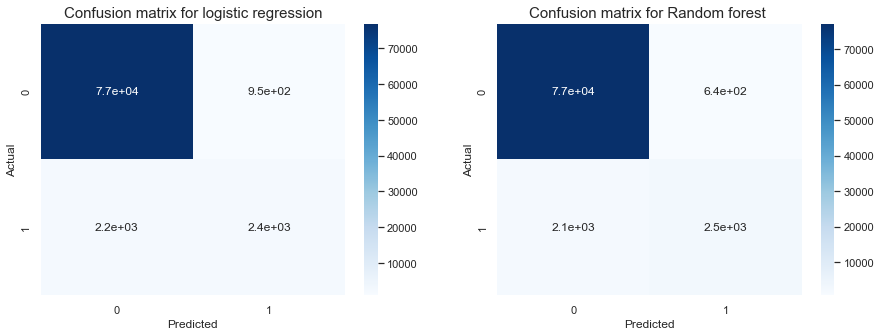

In [40]:
# plotting confusion matrix
fig ,(ax1,ax2) = plt.subplots(1,2, figsize=(15,5))

log_plot = sns.heatmap(log_cm,annot = True,ax = ax1, cmap = "Blues")
log_plot.set(xlabel='Predicted', ylabel='Actual')
log_plot.set_title("Confusion matrix for logistic regression",fontsize =15)

knn_plot = sns.heatmap(forest_cm,annot = True,ax = ax2, cmap = "Blues")
knn_plot.set(xlabel='Predicted', ylabel='Actual')
knn_plot.set_title("Confusion matrix for Random forest ",fontsize =15)

plt.savefig('Confusion_mat.png',dpi=300)
plt.show()

In [41]:
A1 = metrics.accuracy_score(y_test,y_pred_log)  
P1 = metrics.precision_score(y_test,y_pred_log) 
R1 = metrics.recall_score(y_test,y_pred_log)  
F1 = metrics.f1_score(y_test,y_pred_log) 

A2 = metrics.accuracy_score(y_test,y_pred_forest)  
P2 = metrics.precision_score(y_test,y_pred_forest) 
R2 = metrics.recall_score(y_test,y_pred_forest)  
F2 = metrics.f1_score(y_test,y_pred_forest)

In [42]:
perform = [[A1,P1,R1,F1],[A2,P2,R2,F2]]
performance = pd.DataFrame(perform,
                           index = ['logistic regression','Random forest'],
                           columns = ['Accuracy','Precision','Recall','F1 Score'])
performance

,Accuracy,Precision,Recall,F1 Score
logistic regression,0.961703,0.713162,0.515981,0.598755
Random forest,0.967086,0.796290,0.545096,0.647173


The one with better performance is ***RANDOM FOREST***

In [43]:
print(x_test[0])

[0 0 1 0 0 0 0 0 0]


In [48]:
a = x_test[0]
forest.predict([a])


array([0], dtype=uint8)